In [1]:
import sys
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [2]:
#what is the current working directory?
import os
os.getcwd()

'C:\\Users\\maden\\Documents\\DataProjects\\WiDS2020\\HiddenFigures\\02_code'

In [3]:
#Dependencies
import numpy as np
import pandas as pd
import re

from datetime import date, datetime

#set df scrolling
pd.set_option("display.max.columns",None)
#set df precision to 2 decimals for now...
pd.set_option("display.precision",2)
pd.set_option('display.max_rows',500)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
enc = OneHotEncoder(handle_unknown = 'ignore')
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics




# Load Test / Train Data

In [4]:
#Import Train Data
dfpath_train = "../01_data/training_v2.csv"
dfpath_test = "../01_data/unlabeled.csv"

df_train = pd.read_csv(dfpath_train)
print(df_train.shape)

df_test = pd.read_csv(dfpath_test)
print(df_test.shape)

target_col = 'hospital_death'

(91713, 186)
(39308, 186)


# Preprocessing

In [5]:
#How many NA records are in each column?
# df_train.isna().sum()

In [6]:
# df_test.isna().sum()

In [7]:
#process numeric columns
df_train_numeric = df_train._get_numeric_data()
#df_train_numeric.head()
df_train_numeric.shape

(91713, 178)

In [8]:
#process numeric columns
df_test_numeric = df_test._get_numeric_data()
# df_test_numeric.head()
df_test_numeric.shape

(39308, 178)

In [9]:
df_train_cat = df_train.drop(df_train_numeric, axis = 1)
# df_train_cat.head()
df_train_cat.shape

(91713, 8)

In [10]:
df_test_cat = df_test.drop(df_test_numeric, axis = 1)
# df_test_cat.head()
df_test_cat.shape

(39308, 8)

In [11]:
# df_train_cat.dtypes

In [12]:
# df_test_cat.dtypes

In [13]:
#There is one missing category type from the test dataset that is NOT in the train dataset
#hospital admit source. 

In [14]:
# #Do not drop null values because the test set has null values too... 
# #Encode only the categorical columns apache2 and apache3
# enc_df = pd.get_dummies(df_train[['icu_admit_source','icu_stay_type','icu_type','apache_3j_bodysystem','apache_2_bodysystem']], drop_first = True)
# #enc_df.head()
# enc_df.shape

In [15]:
# #Encode only the categorical columns apache2 and apache3
# enc_df_test = pd.get_dummies(df_test[['icu_admit_source','icu_stay_type','icu_type','apache_3j_bodysystem','apache_2_bodysystem']], drop_first = True)
# #enc_df_test.head()
# enc_df_test.shape

In [16]:
# #combine numeric columns with the dummy columns
# df_train_new= pd.concat([df_train_numeric,enc_df], axis =1)


df_train_new = df_train.drop(df_train_cat, axis = 1)
df_train_new.shape

(91713, 178)

In [17]:
# #combine numeric columns with the dummy columns
# df_test_new= pd.concat([df_test_numeric,enc_df_test], axis =1)


df_test_new = df_test.drop(df_test_cat, axis = 1)
df_test_new.shape

(39308, 178)

# Prepare for Machine Learning

In [18]:
#which columns have > 20% of their columns as NA?

# #Example 1: Remove Missing Values  (Will significantly reduce our dataset)
#drop columns with > 25% of rows with missing values  - How does this impact our dataset?
threshold = int(len(df_train_new) * .25)
#threshold = 22928   #> than this is missing... drop the column
print(threshold)
df_train_new = df_train_new.dropna(thresh = threshold, axis = 1)
df_train_new.head()


22928


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_inr_max,h1_inr_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154,25312,118,0,68.0,22.73,0,180.3,92,5.42e-01,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,0,77.0,27.42,0,160.0,90,9.28e-01,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,NaN,1.0,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,NaN,NaN,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,1.3,1.3,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,145.0,143.0,1.3,1.3,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.00,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,119783,50777,118,0,25.0,31.95,0,172.7,93,6.94e-04,0,95.3,NaN,122.0,703.03,0,0.0,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,37.0,NaN,36.7,NaN,0.0,NaN,NaN,NaN,88.0,48.0,88.0,48.0,96.0,68.0,NaN,NaN,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,NaN,NaN,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.

In [19]:
#Column names being fed to model minus the prediction columns and those that are not as relevant
#train_features = list(df_train_new.drop(['hospital_death', 'encounter_id','patient_id'], axis = 1).columns.values)
#train_features = list(df_train_new.drop([ 'encounter_id','patient_id'], axis = 1).columns.values)

#Based on model importances, leave out all of the apache bodysystem values?
#and the other categorical feature too.  The model got worse when they were added in. 

# train_features = list(df_train_new.drop(['encounter_id','patient_id','apache_3j_bodysystem_Gastrointestinal', \
#                                         'apache_3j_bodysystem_Genitourinary', 'apache_3j_bodysystem_Gynecological', \
#                                         'apache_3j_bodysystem_Hematological', 'apache_3j_bodysystem_Metabolic', \
#                                         'apache_3j_bodysystem_Musculoskeletal/Skin', \
#                                         'apache_3j_bodysystem_Neurological', \
#                                         'apache_3j_bodysystem_Respiratory', 'apache_3j_bodysystem_Sepsis', \
#                                         'apache_3j_bodysystem_Trauma', 'apache_2_bodysystem_Gastrointestinal', \
#                                         'apache_2_bodysystem_Haematologic', 'apache_2_bodysystem_Metabolic',\
#                                         'apache_2_bodysystem_Neurologic', 'apache_2_bodysystem_Renal/Genitourinary', \
#                                         'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma', \
#                                         'apache_2_bodysystem_Undefined Diagnoses',\
#                                         'apache_2_bodysystem_Undefined diagnoses'\
#                                         ], axis = 1).columns.values)

train_features = list(df_train_new.drop(['encounter_id','patient_id'], axis = 1).columns.values)

print(train_features)

['hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasiv

In [20]:
#Pop out the columns that are only identifiers  ie. encounter and patient id 
# These can be merged back into the result later
identifiers_train = df_train_new[['encounter_id','patient_id']]
identifiers_train.head()

,encounter_id,patient_id
0,66154,25312
1,114252,59342
2,119783,50777
3,79267,46918
4,92056,34377


In [21]:
identifiers_test = df_test_new[['encounter_id','patient_id']]
identifiers_test.head()

,encounter_id,patient_id
0,2,127112
1,5,130737
2,7,101458
3,8,48067
4,10,25865


In [22]:
#Select Specific Features
#df_train_new = df_train_new.drop(['encounter_id','patient_id'], axis = 1)
#using features list above
df_train_new = df_train_new[train_features]
df_train_new.head()

,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_inr_max,h1_inr_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,118,0,68.0,22.73,0,180.3,92,5.42e-01,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,81,0,77.0,27.42,0,160.0,90,9.28e-01,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,NaN,1.0,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,NaN,NaN,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,1.3,1.3,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,145.0,143.0,1.3,1.3,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.00,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,118,0,25.0,31.95,0,172.7,93,6.94e-04,0,95.3,NaN,122.0,703.03,0,0.0,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,37.0,NaN,36.7,NaN,0.0,NaN,NaN,NaN,88.0,48.0,88.0,48.0,96.0,68.0,NaN,NaN,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,NaN,NaN,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,118,0,81.0,22.64,1,165.1,92,6.94e-

In [23]:
#df_test_new = df_test_new.drop(['encounter_id','patient_id'], axis = 1)
#use the same features columns for the test dataset
df_test_new = df_test_new[train_features]
df_test_new.head()

,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_inr_max,h1_inr_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,7,NaN,56.0,21.10,0,180.3,1105,1.04e-01,0,68.6,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,5.0,134.0,36.6,1121.13,0.0,4.7,NaN,NaN,74.0,51.0,74.0,51.0,100.0,78.0,NaN,NaN,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,NaN,NaN,121.0,79.0,121.0,79.0,37.1,36.6,55.0,51.0,55.0,51.0,88.0,84.0,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,91.0,79.0,91.0,79.0,36.6,36.6,3.7,3.7,NaN,NaN,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,NaN,NaN,NaN,NaN,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,178,NaN,NaN,19.50,1,145.0,1043,2.31e-01,0,41.0,NaN,217.0,1502.02,1,0.0,NaN,NaN,NaN,4.0,6.0,0.0,4.0,NaN,60.0,NaN,0.0,53.0,37.0,NaN,37.0,843.44,0.0,NaN,NaN,NaN,65.0,31.0,65.0,31.0,73.0,60.0,NaN,NaN,108.0,53.0,108.0,53.0,33.0,16.0,99.0,90.0,NaN,NaN,148.0,83.0,148.0,83.0,37.7,36.6,50.0,44.0,50.0,44.0,60.0,60.0,80.0,80.0,80.0,80.0,16.0,16.0,94.0,92.0,121.0,96.0,121.0,96.0,36.6,36.6,3.1,3.1,0.6,0.6,12.0,12.0,8.0,8.0,0.60,0.60,100.0,100.0,31.0,31.0,9.9,9.9,30.9,30.9,NaN,NaN,NaN,NaN,93.0,93.0,4.4,4.4,140.0,140.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86,NaN,66.0,32.52,1,170.2,1035,1.41e-01,0,94.2,NaN,302.0,1208.06,1,0.0,NaN,22.0,1.84,2.0,5.0,0.0,1.0,81.0,124.0,39.2,0.0,115.0,31.0,130.0,35.5,1728.00,0.0,14.8,85.0,57.0,85.0,57.0,NaN,NaN,117.0,86.0,110.0,71.0,110.0,71.0,NaN,NaN,28.0,10.0,100.0,95.0,172.0,102.0,172.0,102.0,NaN,NaN,37.5,35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,19.0,8.7,8.4,1.84,1.63,117.0,81.0,22.0,19.0,12.7,12.2,40.9,39.2,NaN,NaN,NaN,NaN,184.0,181.0,4.7,4.5,135.0,130.0,14.8,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,163,NaN,64.0,20.80,0,182.8,1078,2.08e-03,0,69.5

# Test / Train Split

In [24]:
#useful function:  df._get_numeric_data() will return only numeric columns from a pd dataframe - good for ML models

In [25]:
X = df_train_new.drop([target_col], axis = 1)  #drop off the column to predict
y = df_train_new[target_col].values.reshape(-1,1)

#Prep data for prediction
df_test = df_test_new.drop([target_col], axis = 1)  #drop off the column to predict
#df_test = df_test_new
df_test.head()
print(df_test.shape)

(39308, 130)


In [26]:
X.head(2)

,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_inr_max,h1_inr_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,118,68.0,22.73,0,180.3,92,0.54,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,81,77.0,27.42,0,160.0,90,0.93,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,NaN,1.0,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,NaN,NaN,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,1.3,1.3,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,145.0,143.0,1.3,1.3,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.0,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:

print(X.shape, y.shape)

(91713, 130) (91713, 1)


In [28]:
#Handle the NaN values in the rows  (remove, impute, or find algorithm that allows them)

# Example 2:  Imputing  (mean,median,mode, randomly selected, value estimated from another model (liek nearest neighbors))
#Use the imputer function to replace the NaN values
#I liked this for help... https://www.kaggle.com/learn-forum/62035
##SIMPLE IMPUTER
#imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")

#Impute using other columns ie. Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter = 2, random_state=0)

#Fit the data, function learns the stats
X_imputed = pd.DataFrame(imputer.fit_transform(X))
df_test_imputed = pd.DataFrame(imputer.fit_transform(df_test))
#add titles back
X_imputed.columns = X.columns
df_test_imputed.columns = df_test.columns

X = X_imputed
X.head()

df_test = df_test_imputed
df_test.head()

C:\Users\maden\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
C:\Users\maden\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_inr_max,h1_inr_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,7.0,56.00,21.10,0.0,180.30,1105.0,1.04e-01,0.0,68.6,3.70,301.0,405.01,0.0,0.0,1.29,19.00,0.67,2.0,5.0,0.0,1.0,276.00,105.0,42.0,0.0,57.0,5.0,134.00,36.6,1121.13,0.0,4.70,78.74,50.33,74.0,51.0,74.00,51.00,100.0,78.0,93.32,63.14,86.0,60.0,86.00,60.0,20.0,8.0,100.0,96.0,132.99,87.42,121.0,79.0,121.00,79.00,37.1,36.6,55.00,51.00,55.00,51.00,88.00,84.00,68.00,60.00,68.00,60.00,18.00,8.00,100.00,98.00,91.00,79.00,91.00,79.00,36.60,36.6,3.70,3.70,1.31,1.26,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.00,24.00,13.8,13.8,42.0,42.0,1.54,1.42,2.07,2.16,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,199.25,185.75,1.54,1.42,47.59,43.87,7.36,7.35,139.35,116.49,324.04,296.83,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,178.0,83.13,19.50,1.0,145.00,1043.0,2.31e-01,0.0,41.0,3.08,217.0,1502.02,1.0,0.0,0.63,12.99,0.62,4.0,6.0,0.0,4.0,91.15,60.0,30.4,0.0,53.0,37.0,139.96,37.0,843.44,0.0,2.42,70.54,39.29,65.0,31.0,65.00,31.00,73.0,60.0,111.69,61.12,108.0,53.0,108.00,53.0,33.0,16.0,99.0,90.0,153.92,95.44,148.0,83.0,148.00,83.00,37.7,36.6,50.00,44.00,50.00,44.00,60.00,60.00,80.00,80.00,80.00,80.00,16.00,16.00,94.00,92.00,121.00,96.00,121.00,96.00,36.60,36.6,3.10,3.10,0.60,0.60,12.0,12.0,8.0,8.0,0.60,0.60,100.0,100.0,31.00,31.00,9.9,9.9,30.9,30.9,1.54,1.42,1.45,1.61,93.0,93.0,4.4,4.4,140.0,140.0,3.0,3.0,133.57,145.12,1.54,1.42,56.56,47.98,7.41,7.36,133.79,97.27,315.92,267.54,0.09,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86.0,66.00,32.52,1.0,170.20,1035.0,1.41e-01,0.0,94.2,2.91,302.0,1208.06,1.0,0.0,1.35,22.00,1.84,2.0,5.0,0.0,1.0,81.00,124.0,39.2,0.0,115.0,31.0,130.00,35.5,1728.00,0.0,14.80,85.00,57.00,85.0,57.0,89.13,51.89,117.0,86.0,110.00,71.00,110.0,71.0,113.01,63.3,28.0,10.0,100.0,95.0,172.00,102.00,172.0,102.0,174.41,91.91,37.5,35.5,74.95,62.17,74.03,60.59,97.73,89.55,93.62,78.75,91.45,75.85,20.01,14.78,98.74,97.26,133.83,115.93,132.22,112.77,36.34,36.2,2.95,2.89,1.34,1.19,22.0,19.0,8.7,8.4,1.

In [29]:
print(X.shape)

(91713, 130)


In [41]:

# #How many NA records are in each column?
# X.isna().sum()

In [42]:
# #Normalize the data
# #StandardScaler applies a Guassian distribution to our data where the mean is 0 and the standard deviation is 1. 
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X)
# y_scaler = StandardScaler().fit(y)
# df_test_scaler = StandardScaler().fit(df_test)
# X_scaled = X_scaler.transform(X)
# y_scaled = y_scaler.transform(y)
# df_test_scaled = df_test_scaler.transform(df_test)


In [43]:
# df_test_scaled.shape

In [44]:
# df_test.shape

In [45]:
# Use train_test_split to create training and testing data from our "train" dataset
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils

In [47]:
#Fix Data Type
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
y_test_encoded = lab_enc.fit_transform(y_test)
print(y_train_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

[0 0 0 ... 0 0 0]
binary
binary
binary


C:\Users\maden\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Logistic Regression

In [48]:

# Fit regression model
lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, \
                            class_weight=None, random_state=None, solver='lbfgs', max_iter=1000, multi_class='auto', \
                            verbose=0, warm_start=False, n_jobs=None)
model = lr
model.fit(X_train, y_train_encoded)
predictions = model.predict(X_test)

training_score = model.score(X_train, y_train_encoded)
testing_score = model.score(X_test, y_test_encoded)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9264363805536171
Testing Score: 0.9257272449736142


C:\Users\maden\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


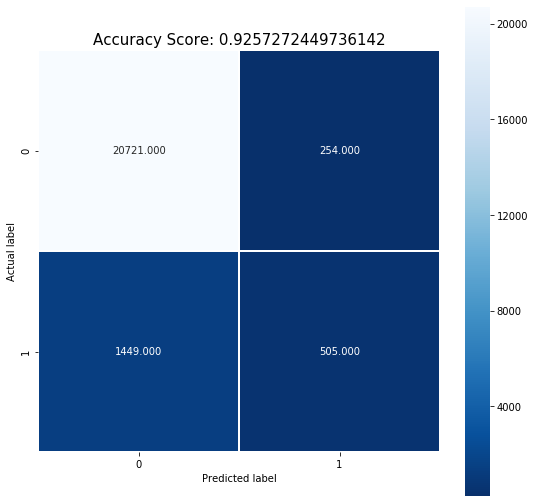

In [49]:
#Confusion Matrix (Seaborn)
#This is where we look at False positive, False negative etc. 

conf_matrix = metrics.confusion_matrix(y_test_encoded, predictions )


#this is awesome:  https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(testing_score)
plt.title(all_sample_title, size = 15);

In [39]:
# #Grid search to select models and parameters for the model
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# #Love this:  https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

# # Create first pipeline for base without reducing features.

# pipe = Pipeline([('classifier' , LogisticRegression())])

# # Create param grid.

# param_grid = [
#     {'classifier' : [LogisticRegression()],
#      'classifier__penalty' : ['l1', 'l2'],
#     'classifier__C' : np.logspace(-4, 4, 20),
#     'classifier__solver' : ['liblinear']},
#     {'classifier' : [RandomForestClassifier()],
#     'classifier__n_estimators' : list(range(10,101,10)),
#     'classifier__max_features' : list(range(6,32,5))}
# ]

# # Create grid search object

# clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# # Fit on data

# best_clf = clf.fit(X_train, y_train_encoded)
# predictions =clf.predict(X_test)

# training_score = clf.score(X_train, y_train_encoded)
# testing_score = clf.score(X_test, y_test_encoded)

# print(clf.best_params_)

# print(clf.best_score_)

# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")

# #Confusion Matrix (Seaborn)
# #This is where we look at False positive, False negative etc. 

# conf_matrix = metrics.confusion_matrix(y_test_encoded, predictions )


# #this is awesome:  https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
# plt.figure(figsize=(9,9))
# sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(testing_score)
# plt.title(all_sample_title, size = 15);

In [40]:
#Need to use the best model... 

# Random Forest Classifier

In [50]:
# Fit regression model
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=130, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None)
model = rf
model.fit(X_train, y_train_encoded)
predictions = model.predict(X_test)

training_score = model.score(X_train, y_train_encoded)
testing_score = model.score(X_test, y_test_encoded)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 0.9288237603035457


In [51]:
print(model.feature_importances_)

[0.00836192 0.00957308 0.00985615 0.00020607 0.00784587 0.0093875
 0.01042302 0.         0.00857227 0.00537515 0.00537369 0.0073625
 0.00017116 0.00105909 0.00546925 0.00558274 0.00545319 0.00183474
 0.00215164 0.00145204 0.00196576 0.00667586 0.00742408 0.00510425
 0.00101562 0.00618069 0.00562129 0.00493129 0.0060806  0.00924589
 0.00077066 0.00725417 0.00685315 0.00752215 0.00415005 0.00467403
 0.00425528 0.00434731 0.00720293 0.01574041 0.00725663 0.01294005
 0.004069   0.00473227 0.00397836 0.00527111 0.00689729 0.00883066
 0.00312407 0.01470551 0.0101363  0.00925128 0.00486712 0.00624944
 0.00463187 0.00623794 0.0107396  0.00690323 0.00378437 0.00360897
 0.00376553 0.00407477 0.00591281 0.00613465 0.00347765 0.0033481
 0.00330664 0.00352156 0.00679122 0.00712745 0.00399019 0.00540076
 0.00400683 0.00390684 0.00412563 0.0043047  0.00667984 0.0063039
 0.00553479 0.00524593 0.00527754 0.00629359 0.00579008 0.00724269
 0.00621096 0.00622715 0.00557805 0.00571744 0.00696514 0.00776295

In [52]:
# for feature, importance in dict(zip(train_features,model.feature_importances_)):
#     print(feature)

importances = dict(zip(train_features,model.feature_importances_))
for f, i in sorted(importances.items(), key = lambda item: item[1], reverse = True):
    print(f, i)

# best_features = []
# for f, i in sorted(importances.items(), key = lambda item: item[1], reverse = True):
#     if i > .009:
#         best_features.append(f)
        
# print(best_features)
        


apache_4a_hospital_death_prob 0.1158923516128676
d1_pao2fio2ratio_min 0.09742722387317723
d1_lactate_max 0.05864455268907912
d1_heartrate_max 0.0157404070285478
d1_spo2_max 0.014705510807477134
d1_mbp_invasive_max 0.012940052243459359
d1_arterial_po2_min 0.011957414668998688
d1_inr_min 0.011124078905568316
d1_sysbp_noninvasive_min 0.010739600343176666
d1_arterial_pco2_min 0.010682070052029272
icu_id 0.010423022077435675
d1_spo2_min 0.01013630011083992
d1_pao2fio2ratio_max 0.009905551317554655
age 0.009856150785849557
hospital_death 0.00957308361501399
height 0.009387501671376225
d1_sysbp_invasive_max 0.009251277719179026
temp_apache 0.00924588775133576
d1_platelets_max 0.009212862254481726
d1_arterial_po2_max 0.009199852261553915
d1_resprate_max 0.008830659019991648
d1_lactate_min 0.008820454352745123
d1_arterial_ph_max 0.008689165287232972
readmission_status 0.008572266887100692
hospital_id 0.008361924668849557
d1_arterial_ph_min 0.008286895874091057
h1_inr_min 0.008220603162060351
d1

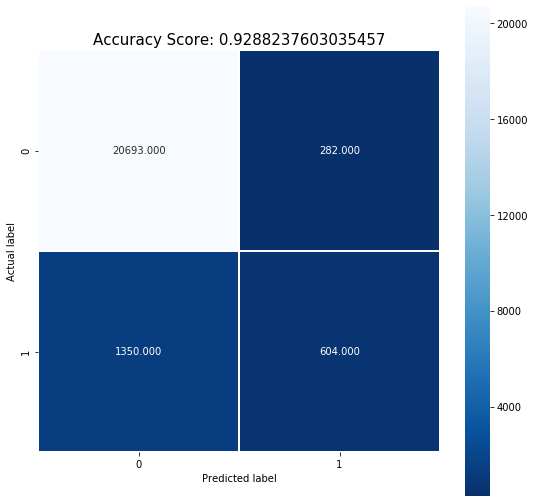

In [53]:
#Confusion Matrix (Seaborn)
#This is where we look at False positive, False negative etc. 

conf_matrix = metrics.confusion_matrix(y_test_encoded, predictions )


#this is awesome:  https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(testing_score)
plt.title(all_sample_title, size = 15);

In [54]:
#Now we need to be able to get the prediction into the format needed for submittal
#add feature importances in here too, so that we can improve! 

In [55]:
print(target_col)

hospital_death


In [59]:
df_test.head()

,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_inr_max,h1_inr_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
0,7.0,56.00,21.10,0.0,180.30,1105.0,1.04e-01,0.0,68.6,3.70,301.0,405.01,0.0,0.0,1.29,19.00,0.67,2.0,5.0,0.0,1.0,276.00,105.0,42.0,0.0,57.0,5.0,134.00,36.6,1121.13,0.0,4.70,78.74,50.33,74.0,51.0,74.00,51.00,100.0,78.0,93.32,63.14,86.0,60.0,86.00,60.0,20.0,8.0,100.0,96.0,132.99,87.42,121.0,79.0,121.00,79.00,37.1,36.6,55.00,51.00,55.00,51.00,88.00,84.00,68.00,60.00,68.00,60.00,18.00,8.00,100.00,98.00,91.00,79.00,91.00,79.00,36.60,36.6,3.70,3.70,1.31,1.26,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.00,24.00,13.8,13.8,42.0,42.0,1.54,1.42,2.07,2.16,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,199.25,185.75,1.54,1.42,47.59,43.87,7.36,7.35,139.35,116.49,324.04,296.83,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,178.0,83.13,19.50,1.0,145.00,1043.0,2.31e-01,0.0,41.0,3.08,217.0,1502.02,1.0,0.0,0.63,12.99,0.62,4.0,6.0,0.0,4.0,91.15,60.0,30.4,0.0,53.0,37.0,139.96,37.0,843.44,0.0,2.42,70.54,39.29,65.0,31.0,65.00,31.00,73.0,60.0,111.69,61.12,108.0,53.0,108.00,53.0,33.0,16.0,99.0,90.0,153.92,95.44,148.0,83.0,148.00,83.00,37.7,36.6,50.00,44.00,50.00,44.00,60.00,60.00,80.00,80.00,80.00,80.00,16.00,16.00,94.00,92.00,121.00,96.00,121.00,96.00,36.60,36.6,3.10,3.10,0.60,0.60,12.0,12.0,8.0,8.0,0.60,0.60,100.0,100.0,31.00,31.00,9.9,9.9,30.9,30.9,1.54,1.42,1.45,1.61,93.0,93.0,4.4,4.4,140.0,140.0,3.0,3.0,133.57,145.12,1.54,1.42,56.56,47.98,7.41,7.36,133.79,97.27,315.92,267.54,0.09,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,86.0,66.00,32.52,1.0,170.20,1035.0,1.41e-01,0.0,94.2,2.91,302.0,1208.06,1.0,0.0,1.35,22.00,1.84,2.0,5.0,0.0,1.0,81.00,124.0,39.2,0.0,115.0,31.0,130.00,35.5,1728.00,0.0,14.80,85.00,57.00,85.0,57.0,89.13,51.89,117.0,86.0,110.00,71.00,110.0,71.0,113.01,63.3,28.0,10.0,100.0,95.0,172.00,102.00,172.0,102.0,174.41,91.91,37.5,35.5,74.95,62.17,74.03,60.59,97.73,89.55,93.62,78.75,91.45,75.85,20.01,14.78,98.74,97.26,133.83,115.93,132.22,112.77,36.34,36.2,2.95,2.89,1.34,1.19,2

In [62]:
#Make new prediction on the df_test data
#df_test[target_col] = model.predict(df_test)
df_test[target_col] = model.predict_proba(df_test)[:,1]

ValueError: Number of features of the model must match the input. Model n_features is 130 and input n_features is 131 

In [ ]:
df_test.head()

In [ ]:
#add the identifier "encounter_id" back in

df_test['encounter_id'] = identifiers_test['encounter_id']

In [ ]:
df_test.head()

In [58]:
#Convert encounter_id to int32
df_test['encounter_id'] = pd.to_numeric(df_test['encounter_id'],downcast = 'integer')

KeyError: 'encounter_id'

In [ ]:
output = df_test[['encounter_id','hospital_death']]
output.head()

In [ ]:
df_test['encounter_id'].dtype

In [ ]:
output.to_csv("../06_submissions/" + str(date.today()) + "_7" + ".csv", index=False)